<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 111.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 11.2 MB/s eta 0:00:00
   ━━

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here

# Check for missing values in critical columns
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Fill missing values in 'Employment' with the most frequent value
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)

# Fill missing values in 'JobSat' with the most frequent value
df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)

# Fill missing values in 'RemoteWork' with the most frequent value
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

# Verify that missing values have been handled
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_145/1033910823.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_145/1033910823.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [6]:
## Write your code here

# Convert 'YearsCodePro' to numeric values
df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(lambda x: 0.5 if x == 'Less than 1 year' else float(x) if x != 'More than 50 years' else 50)

# Impute missing values with the median of the numeric column
median_years = df['YearsCodePro_numeric'].median()
df['YearsCodePro_numeric'].fillna(median_years, inplace=True)

# Create experience ranges for 'YearsCodePro_numeric'
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_numeric'], bins=bins, labels=labels)

# Calculate median job satisfaction for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Display the result
print(median_job_sat)

  ExperienceRange  JobSat
0             0-5     8.0
1            5-10     8.0
2           10-20     8.0
3             >20     8.0


/tmp/ipykernel_145/2975628993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro_numeric'].fillna(median_years, inplace=True)
/tmp/ipykernel_145/2975628993.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


/tmp/ipykernel_145/1381040577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')


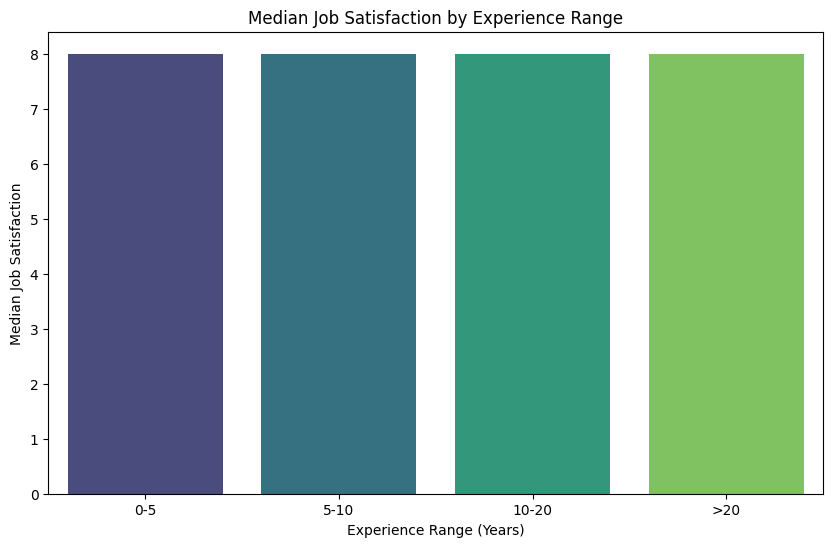

In [7]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_145/2869385983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


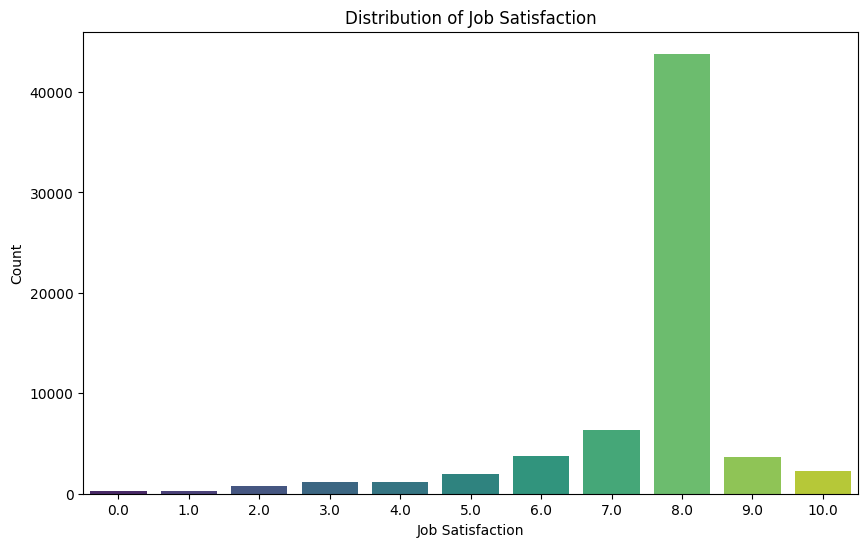

In [8]:
## Write your code here

# Visualize the distribution of JobSat values
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_145/2380434825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


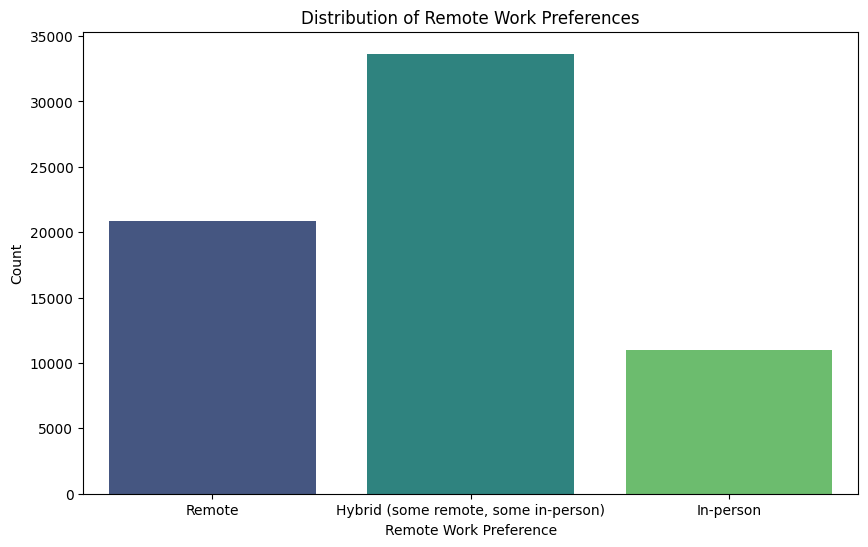

In [9]:
## Write your code here

# Visualize the distribution of RemoteWork values
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

Remote Work Preferences by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                  

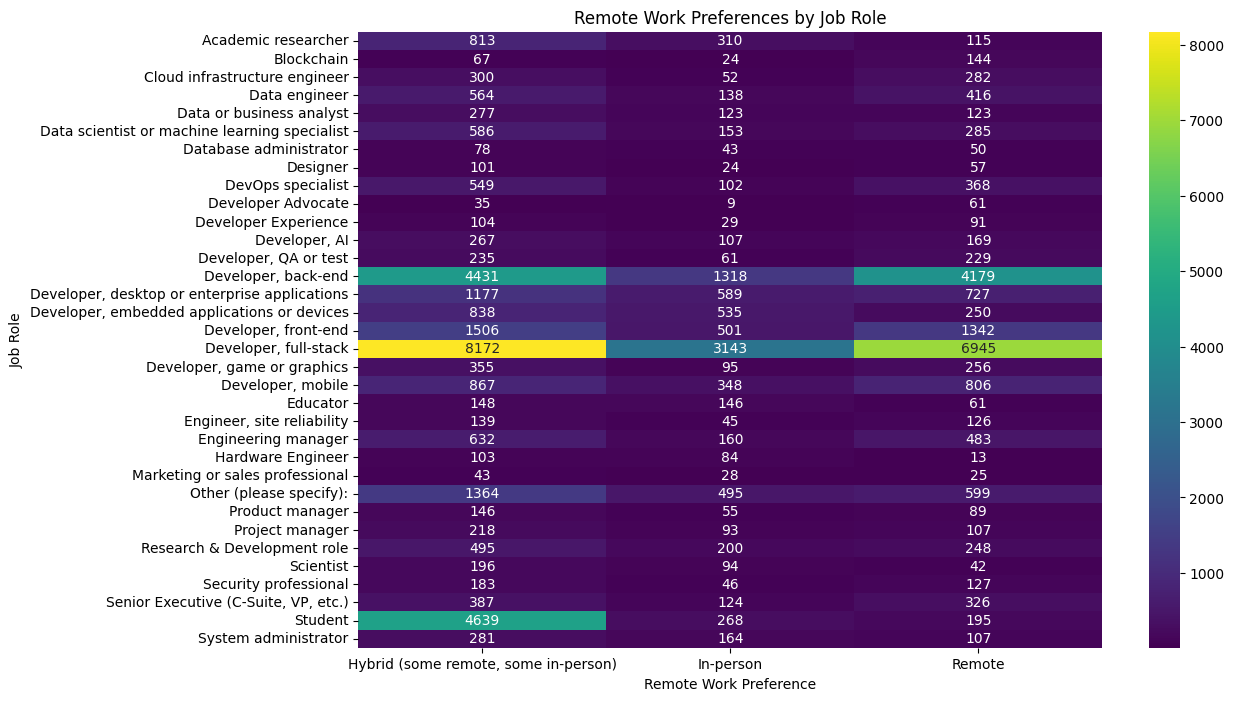

In [10]:
# Cross-tabulate RemoteWork preferences by Employment type
remote_work_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Remote Work Preferences by Employment Type:")
print(remote_work_by_employment)

# Cross-tabulate RemoteWork preferences by Job Roles (DevType)
remote_work_by_job_role = pd.crosstab(df['DevType'], df['RemoteWork'])
print("\nRemote Work Preferences by Job Role:")
print(remote_work_by_job_role)

In [ ]:
# Visualize Remote Work Preferences by Job Role
plt.figure(figsize=(12, 8))
sns.heatmap(remote_work_by_job_role, annot=True, fmt='d', cmap='viridis')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Remote Work Preference')
plt.ylabel('Job Role')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [11]:
## Write your code here

# Filter data by specific countries or regions
countries_of_interest = ['United States of America', 'United Kingdom', 'India', 'Germany', 'Canada']
filtered_df = df[df['Country'].isin(countries_of_interest)]

In [12]:
# Split the 'LanguageHaveWorkedWith' column into individual languages
filtered_df['Languages'] = filtered_df['LanguageHaveWorkedWith'].str.split(';')

# Explode the list of languages into separate rows
exploded_df = filtered_df.explode('Languages')

# Count the occurrences of each language by country
language_counts_by_country = exploded_df.groupby(['Country', 'Languages']).size().unstack(fill_value=0)

# Display the top programming languages by country
print(language_counts_by_country)

/tmp/ipykernel_145/1009528953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Languages'] = filtered_df['LanguageHaveWorkedWith'].str.split(';')


Languages                 Ada  Apex  Assembly  Bash/Shell (all shells)     C  \
Country                                                                        
Canada                     11    18       115                      798   415   
Germany                    26    25       324                     1970  1147   
India                      32    27       141                      759  1084   
United States of America   83   128       641                     4776  2225   

Languages                   C#   C++  Clojure  Cobol  Crystal  Dart  Delphi  \
Country                                                                       
Canada                     603   488       27     15       14    97      34   
Germany                   1185  1315       59     34       14   287      99   
India                      645  1127       30     24       11   408       6   
United States of America  3112  2607      187     85       59   370     120   

Languages                 Elixir  Erlang   F

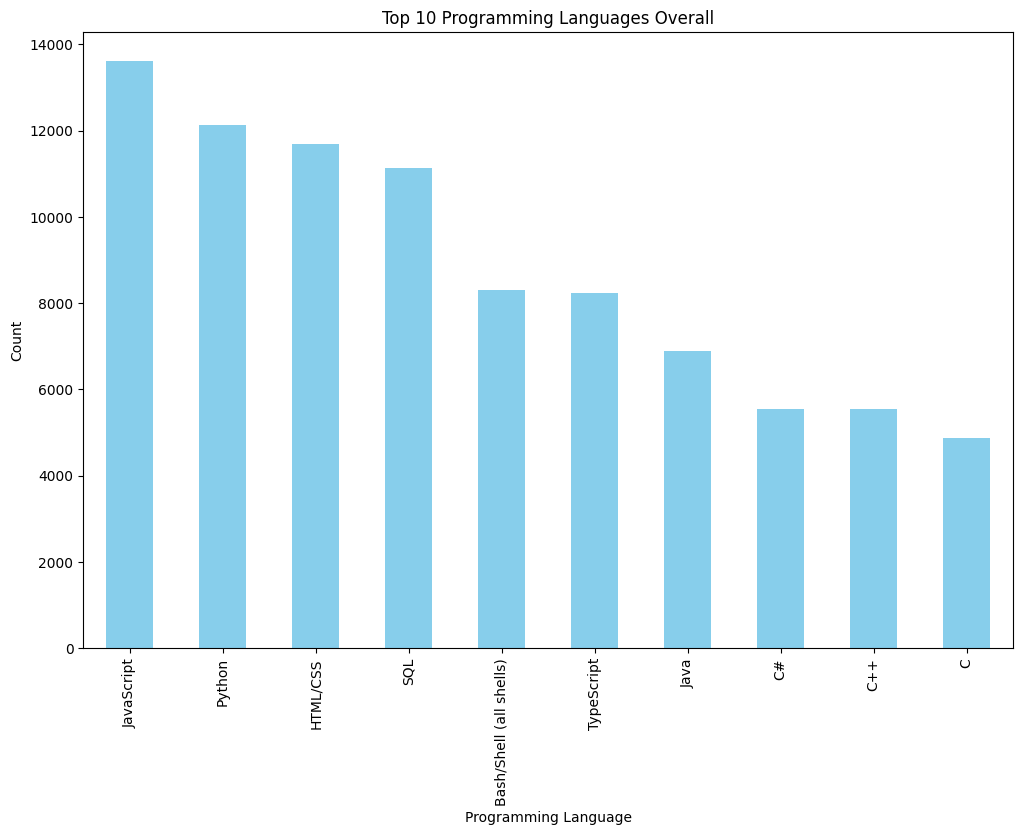

In [13]:
# Visualize the top programming languages by region with a bar plot
plt.figure(figsize=(12, 8))
language_counts_by_country.sum().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Overall')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.show()

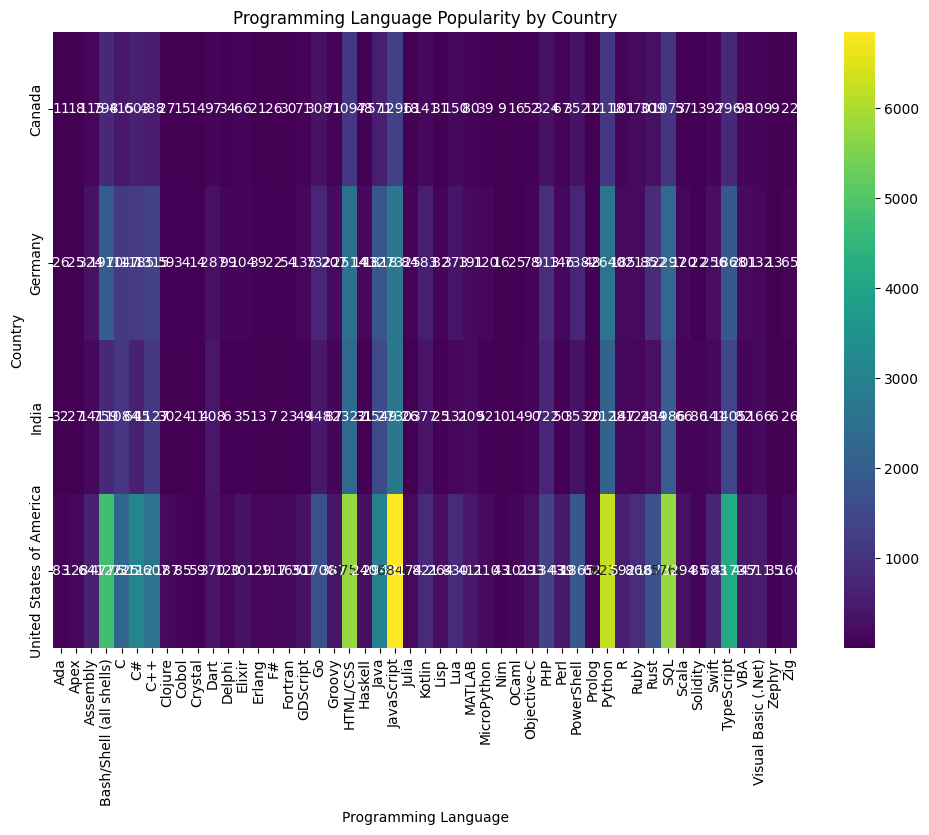

In [14]:
# Visualize the top programming languages by region with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(language_counts_by_country, annot=True, fmt='d', cmap='viridis')
plt.title('Programming Language Popularity by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


/tmp/ipykernel_145/4090342555.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro_numeric'].fillna(median_years, inplace=True)


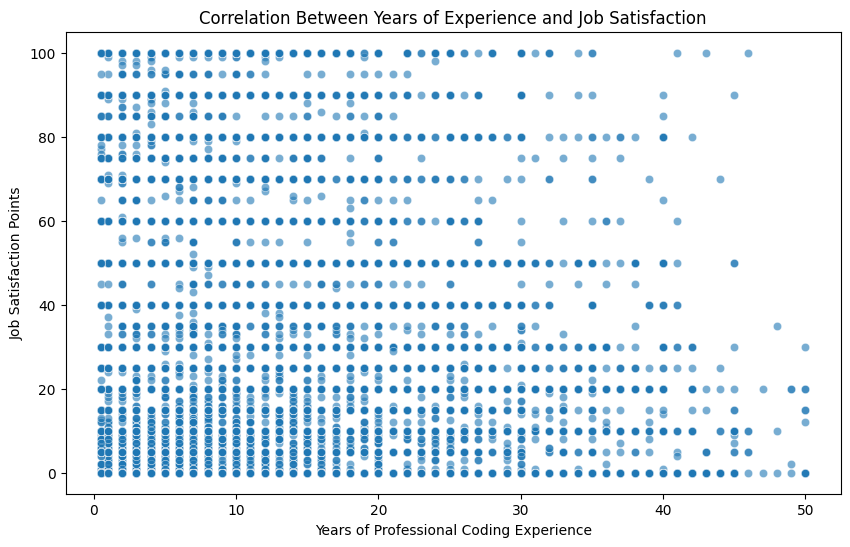

In [15]:
## Write your code here

# Convert 'YearsCodePro' to numeric values
df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(lambda x: 0.5 if x == 'Less than 1 year' else float(x) if x != 'More than 50 years' else 50)

# Impute missing values with the median of the numeric column
median_years = df['YearsCodePro_numeric'].median()
df['YearsCodePro_numeric'].fillna(median_years, inplace=True)

# Visualize the relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro_numeric', y='JobSatPoints_1', data=df, alpha=0.6)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [17]:
## Write your code here

# Cross-tabulate EdLevel by Employment type
edlevel_by_employment = pd.crosstab(df['EdLevel'], df['Employment'])
print("Educational Background by Employment Type:")
print(edlevel_by_employment)

Educational Background by Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree

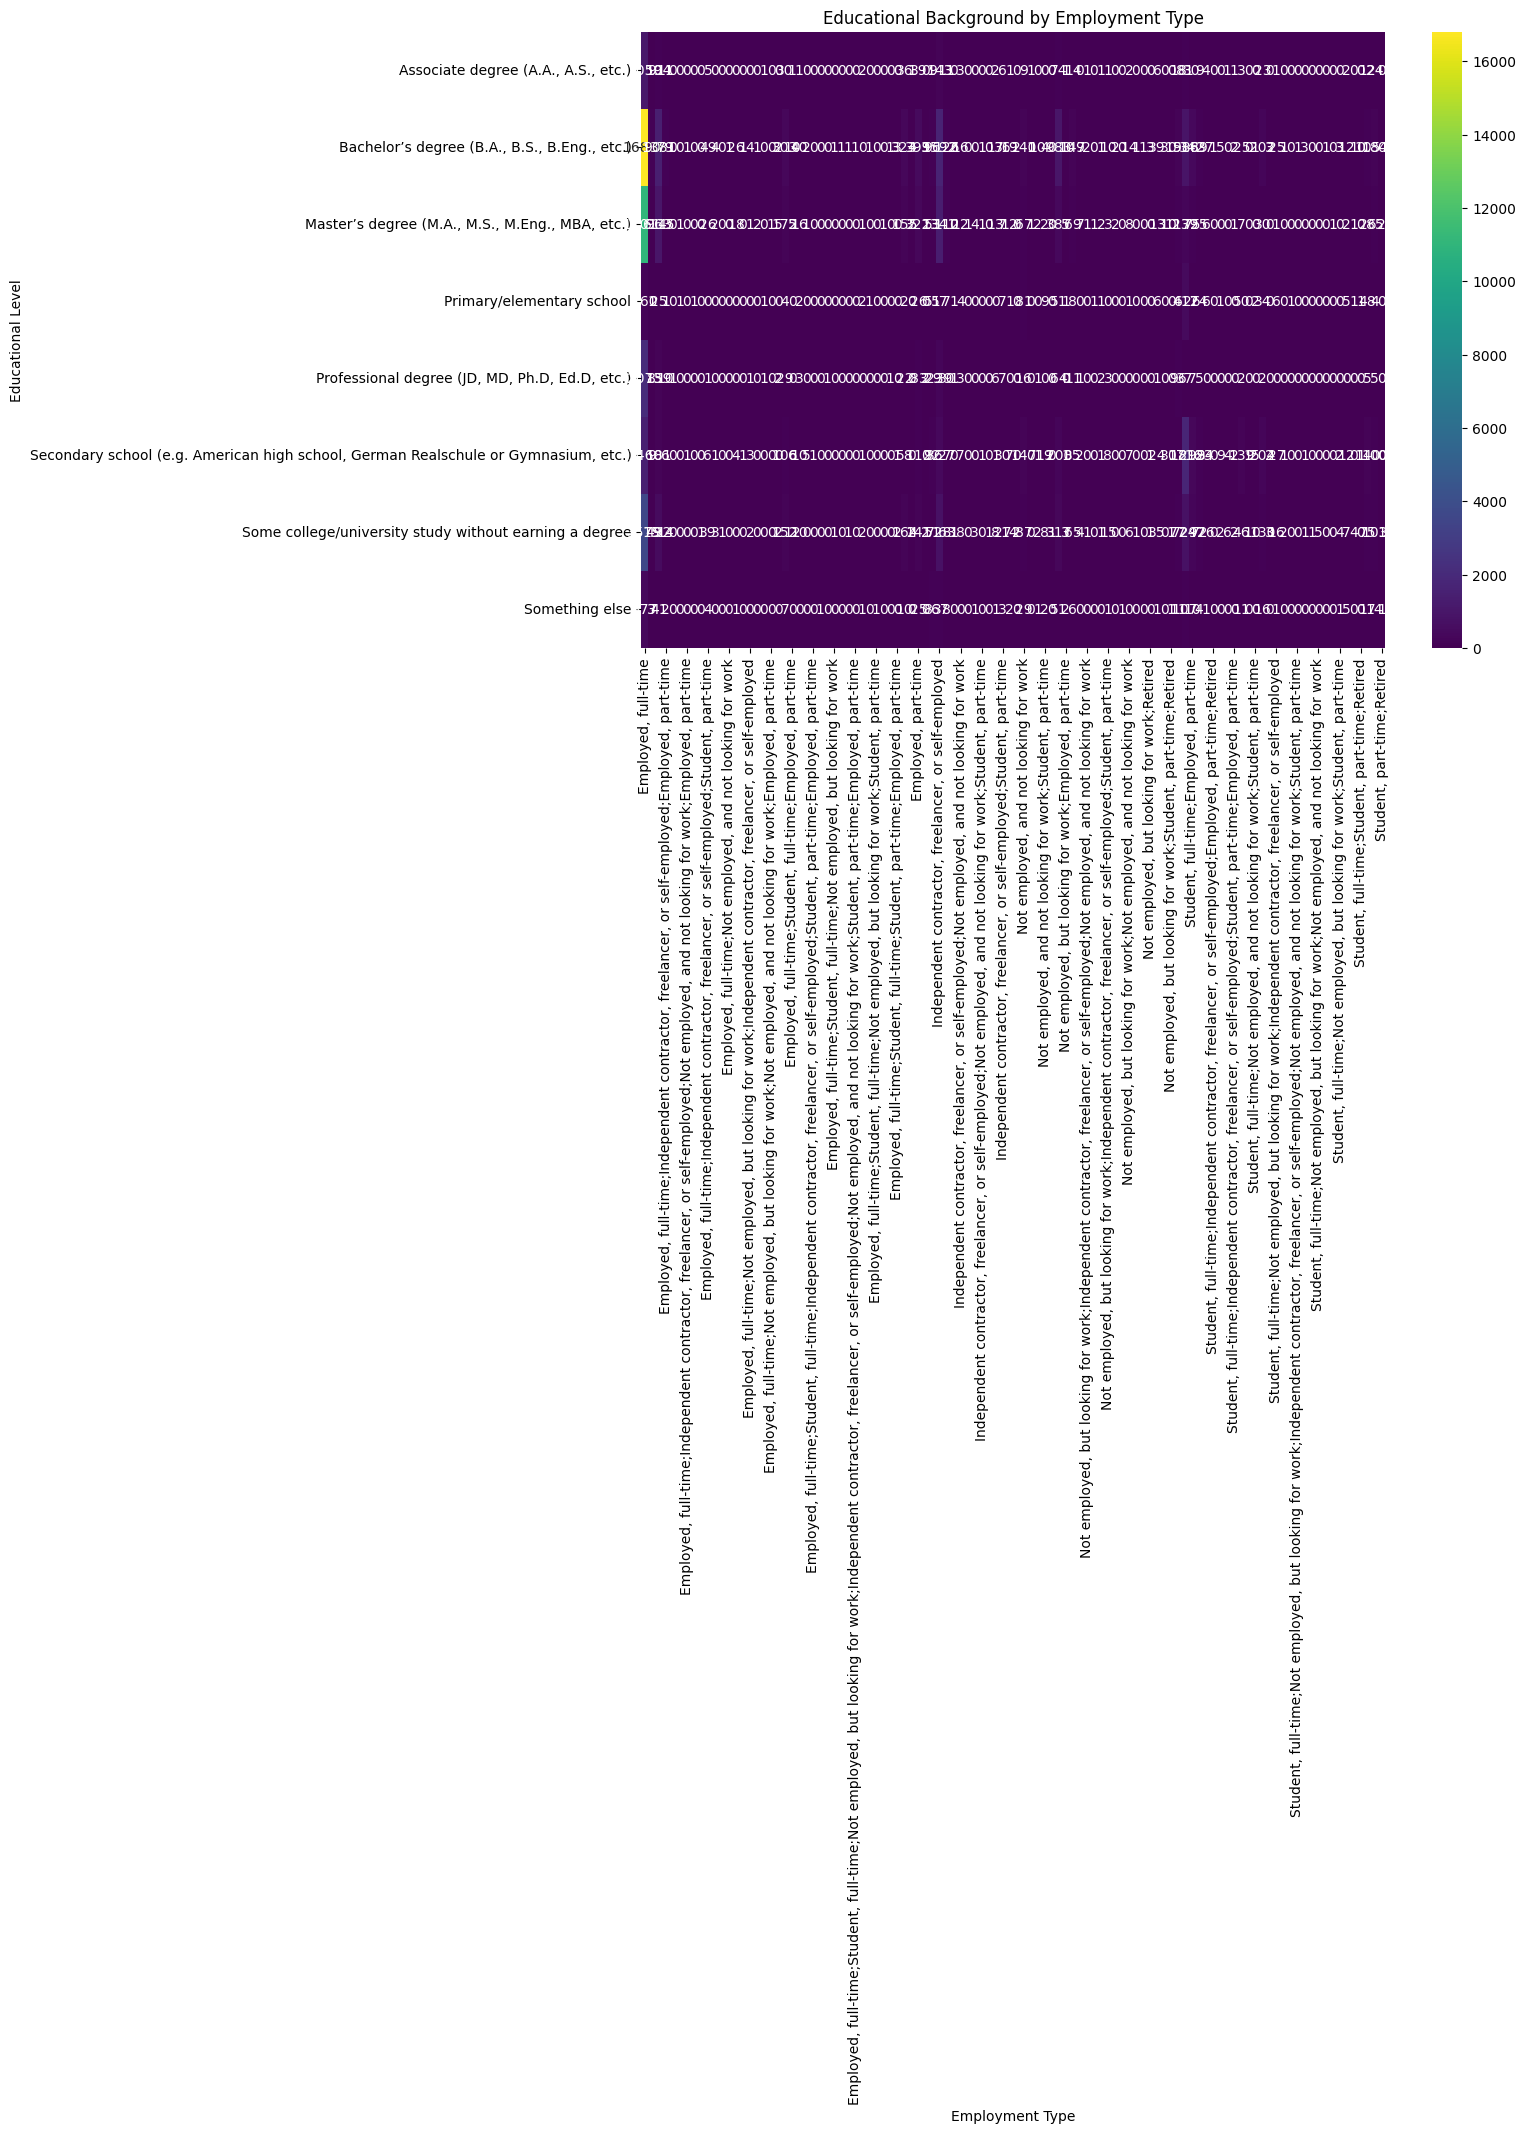

In [18]:
# Visualize Educational Background by Employment Type
plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_by_employment, annot=True, fmt='d', cmap='viridis')
plt.title('Educational Background by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [19]:
## Write your code here

# Save the modified dataset to a new CSV file
df.to_csv('cleaned_and_analyzed.csv', index=False)
print("Cleaned and analyzed dataset saved as 'cleaned_and_analyzed.csv'")

Cleaned and analyzed dataset saved as 'cleaned_and_analyzed.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
